In [1]:
import xarray
#from dask_jobqueue import SLURMCluster
#from dask.distributed import Client
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas


In [2]:
RAMA_moorings_file_path = '/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/'

variable_list = ['Rain']
#variable_list = ['SW_rad']

high_resolution_sub_dirs = ['two_minutes','10_minutes','20_minutes','30_minutes','hourly']


mooring_labels_for_variable      = {k: {} for k in variable_list}
mooring_full_path_for_variable   = {k: {} for k in variable_list}
mooring_start_time_for_variable   = {k: {} for k in variable_list}
mooring_end_time_for_variable     = {k: {} for k in variable_list}


for i_variable in variable_list:
    
    variable_root_path = os.path.join(RAMA_moorings_file_path,i_variable)
    
    
    mooring_labels_for_sub_dir      = {k: [] for k in high_resolution_sub_dirs} # dict(zip(high_resolution_sub_dirs,[[],[],[]]))
    mooring_full_paths_for_sub_dir  = {k: [] for k in high_resolution_sub_dirs}

    mooring_start_dates_for_sub_dir = {k: [] for k in high_resolution_sub_dirs}
    mooring_end_dates_for_sub_dir   = {k: [] for k in high_resolution_sub_dirs}
    
    for i_high_res_sub_dir in high_resolution_sub_dirs:
        
        if os.path.isdir(os.path.join(variable_root_path,i_high_res_sub_dir )):
            files_in_subdir = os.listdir(os.path.join(variable_root_path,i_high_res_sub_dir ))
            #print(files_in_subdir)
            
           
            for i_file in files_in_subdir:
                if os.path.isfile(os.path.join(variable_root_path,i_high_res_sub_dir,i_file) ) and i_file.endswith('.cdf'):
                    print(os.path.join(variable_root_path,i_high_res_sub_dir,i_file))
                    if not i_file.endswith('downsampled.cdf'):
                        
                        mooring_dataset  = xarray.open_dataset(os.path.join(variable_root_path,i_high_res_sub_dir,i_file),decode_times=False,use_cftime=False,drop_variables=None)
                 
                        mooring_latitude  =  mooring_dataset['lat'].squeeze().values
                        mooring_longitude =  mooring_dataset['lon'].squeeze().values
                    
                        mooring_time_date          = mooring_dataset['time'].squeeze().values
                        mooring_time_hour_seconds  = mooring_dataset['time2'].squeeze().values
                        units, reference_date = mooring_dataset['time2'].attrs['units'].split('since')
                        
                        mooring_dates = pandas.to_datetime(mooring_time_date, unit='D', origin='julian') + pandas.to_timedelta(mooring_time_hour_seconds,unit='milliseconds')
                        mooring_start_dates_for_sub_dir[i_high_res_sub_dir].append(mooring_dates.min())
                        mooring_end_dates_for_sub_dir[i_high_res_sub_dir].append(mooring_dates.max())
                    
                    
                        mooring_dataset.close()
                        if mooring_latitude<0:
                        
                            mooring_label = str(np.abs(mooring_latitude)) + 's'
                        else:
                        
                            mooring_label = str(np.abs(mooring_latitude)) + 'n'
                        if mooring_longitude>0:
                            mooring_label = mooring_label + str(np.abs(mooring_longitude)) + 'e'
                        else:
                            mooring_label = mooring_label + str(np.abs(mooring_longitude)) + 'w'

                        mooring_labels_for_sub_dir[i_high_res_sub_dir].append(mooring_label)
                        mooring_full_paths_for_sub_dir[i_high_res_sub_dir].append(os.path.join(variable_root_path,i_high_res_sub_dir,i_file))

                    
    mooring_labels_for_variable[i_variable]     = mooring_labels_for_sub_dir
    mooring_full_path_for_variable[i_variable]  = mooring_full_paths_for_sub_dir
    mooring_start_time_for_variable[i_variable] = mooring_start_dates_for_sub_dir
    mooring_end_time_for_variable[i_variable]   = mooring_end_dates_for_sub_dir

/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain4n90e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain4s67e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain12s55e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain0n67e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain4s57e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain12s80.5e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain8s55e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain0n80.5e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain12s67e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10

In [10]:
high_res_frequency_to_downsample = ['two_minutes','10_minutes','20_minutes','30_minutes']
target_frequency                 = 'hourly'
variable_list = ['Rain']

for i_variable in variable_list:
    for i_dir in high_res_frequency_to_downsample:
    
        print(i_dir)
        print(mooring_labels_for_variable[i_variable][i_dir])
        print('=====')
        print(mooring_labels_for_variable[i_variable][target_frequency])
        
        files_to_downsample = list(set(mooring_labels_for_variable[i_variable][i_dir]) - set(mooring_labels_for_variable[i_variable][target_frequency]))
        
        for i_file_to_downsample in files_to_downsample:
            
            print(i_file_to_downsample)
            idx_to_downsample       = mooring_labels_for_variable[i_variable][i_dir].index(i_file_to_downsample)
            full_path_to_downsample = mooring_full_path_for_variable[i_variable][i_dir][idx_to_downsample]
        
        
            print(full_path_to_downsample)
            mooring_dataset  = xarray.open_dataset(full_path_to_downsample,decode_times=False,use_cftime=False,drop_variables=None)
                 
            mooring_latitude  =  mooring_dataset['lat'].squeeze().values
            mooring_longitude =  mooring_dataset['lon'].squeeze().values

            mooring_time_date          = mooring_dataset['time'].squeeze().values
            mooring_time_hour_seconds  = mooring_dataset['time2'].squeeze().values
            units, reference_date = mooring_dataset['time2'].attrs['units'].split('since')
                        
            mooring_dates = pandas.to_datetime(mooring_time_date, unit='D', origin='julian') + pandas.to_timedelta(mooring_time_hour_seconds,unit='milliseconds')
        
        
            mooring_dataset['time']  = mooring_dates
            resampled_mooring_object = mooring_dataset.resample(time="1H")
            if i_variable=='Rain':
                mooring_dataset_downsampled = resampled_mooring_object.mean()
            else:    
                mooring_dataset_downsampled = resampled_mooring_object.mean()  # #.interpolate("linear") # .groupby('TIME.dayofyear').mean(dim='TIME')
            
            output_path = full_path_to_downsample.replace(i_dir,target_frequency)

            if i_dir == 'two_minutes':
                output_path = output_path.replace('2m','hr')
            elif i_dir == '10_minutes':
                output_path = output_path.replace('10m','hr')

            root_path_file, extension = os.path.splitext(output_path)
                
            output_path = root_path_file + '.downsampled' + extension
            mooring_dataset_downsampled.to_netcdf(output_path)     
            
            mooring_dataset.close()

two_minutes
[]
=====
['15.0n65.0e', '8.0s95.0e', '8.0n90.0e', '12.0n90.0e', '5.0s95.0e', '4.0s67.0e', '12.0s80.5e', '8.0s67.0e', '8.0s80.5e', '12.0s67.0e', '4.0s80.5e']
10_minutes
['4.0n90.0e', '4.0s67.0e', '12.0s55.0e', '0.0n67.0e', '4.0s57.0e', '12.0s80.5e', '8.0s55.0e', '0.0n80.5e', '12.0s67.0e', '8.0s80.5e', '1.5s80.5e', '1.5s67.0e', '4.0s80.5e', '1.5n67.0e', '12.0s93.0e', '0.0n90.0e', '12.0n90.0e', '8.0n67.0e', '8.0s67.0e', '8.0n90.0e', '15.0n90.0e']
=====
['15.0n65.0e', '8.0s95.0e', '8.0n90.0e', '12.0n90.0e', '5.0s95.0e', '4.0s67.0e', '12.0s80.5e', '8.0s67.0e', '8.0s80.5e', '12.0s67.0e', '4.0s80.5e']
0.0n90.0e
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain0n90e_10m.cdf
0.0n80.5e
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain0n80.5e_10m.cdf
12.0s93.0e
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain12s93e_10m.cdf
8.0s55.0e
/tube1/cha674/Tropical_Indian_Ocean/

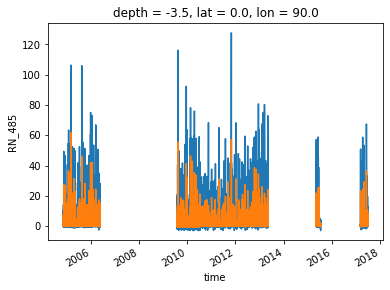

In [9]:
mooring_dataset['RN_485'].plot()
mooring_dataset_downsampled['RN_485'].plot()


In [26]:
high_res_frequency_to_downsample = ['two_minutes','10_minutes','20_minutes','30_minutes']
target_frequency                 = 'hourly'
variable_list = ['Rain']

for i_variable in variable_list:
    for i_dir in high_res_frequency_to_downsample:
    
        print(i_dir)
        print(mooring_labels_for_variable[i_variable][i_dir])
        print(target_frequency)
        print('=====')
        print(mooring_labels_for_variable[i_variable][target_frequency])
        
        files_to_check_for_overlap = list(set(mooring_labels_for_variable[i_variable][i_dir]).intersection(mooring_labels_for_variable[i_variable][target_frequency]))
        print('=====')
        print(files_to_check_for_overlap)
    
        for i_file_to_check in files_to_check_for_overlap:
            print(files_to_check_for_overlap)
            if not i_file.endswith('downsampled.cdf'):
            
                high_frequency_idx_to_check   = mooring_labels_for_variable[i_variable][i_dir].index(i_file_to_check)
                target_frequency_idx_to_check = mooring_labels_for_variable[i_variable][target_frequency].index(i_file_to_check)
        
                high_frequency_start_time   = mooring_start_time_for_variable[i_variable][i_dir][high_frequency_idx_to_check]
                target_frequency_start_time = mooring_start_time_for_variable[i_variable][target_frequency][target_frequency_idx_to_check]
        
                high_frequency_end_time   = mooring_end_time_for_variable[i_variable][i_dir][high_frequency_idx_to_check]
                target_frequency_end_time = mooring_end_time_for_variable[i_variable][target_frequency][target_frequency_idx_to_check]
            
                if (high_frequency_start_time != target_frequency_start_time) or (high_frequency_end_time != target_frequency_end_time):
                    full_path_to_downsample       = mooring_full_path_for_variable[i_variable][i_dir][high_frequency_idx_to_check]
                    full_path_to_target_frequency = mooring_full_path_for_variable[i_variable][target_frequency][target_frequency_idx_to_check]
                    print(full_path_to_downsample)
                    print(full_path_to_target_frequency)
                
                    high_frequency_mooring_dataset  = xarray.open_dataset(full_path_to_downsample,decode_times=False,use_cftime=False,drop_variables=None)
            
                    high_frequency_mooring_time_date          = high_frequency_mooring_dataset['time'].squeeze().values
                    high_frequency_mooring_time_hour_seconds  = high_frequency_mooring_dataset['time2'].squeeze().values
                    units, reference_date      = high_frequency_mooring_dataset['time2'].attrs['units'].split('since')
                        
                    high_frequency_mooring_dates = pandas.to_datetime(high_frequency_mooring_time_date, unit='D', origin='julian') \
                                             + pandas.to_timedelta(high_frequency_mooring_time_hour_seconds,unit='milliseconds')
        
          
                    high_frequency_mooring_dataset['time']  = high_frequency_mooring_dates
                
                    high_frequency_variable_list            =  [i_var for i_var in high_frequency_mooring_dataset.data_vars] 
                
                    target_frequency_mooring_dataset            = xarray.open_dataset(full_path_to_target_frequency,decode_times=False,
                                                                                  use_cftime=False,drop_variables=None)
        
                    target_frequency_mooring_time_date          = target_frequency_mooring_dataset['time'].squeeze().values
                    target_frequency_mooring_time_hour_seconds  = target_frequency_mooring_dataset['time2'].squeeze().values
                    units, reference_date                       = target_frequency_mooring_dataset['time2'].attrs['units'].split('since')
                        
                    target_frequency_mooring_dates = pandas.to_datetime( target_frequency_mooring_time_date, unit='D', origin='julian') \
                                               + pandas.to_timedelta(target_frequency_mooring_time_hour_seconds,unit='milliseconds')
                    target_frequency_mooring_dataset['time']  = target_frequency_mooring_dates
                    target_frequency_variable_list            =  [i_var for i_var in target_frequency_mooring_dataset.data_vars] 

                    common_variables = list(set(target_frequency_variable_list).intersection(high_frequency_variable_list))
                
                
                    resampled_mooring_object = high_frequency_mooring_dataset[common_variables].resample(time="1H")

                    mooring_dataset_downsampled = resampled_mooring_object.mean(dim='time')  # #.interpolate("linear") # .groupby('TIME.dayofyear').mean(dim='TIME')
            
                    uncommon_time_steps = mooring_dataset_downsampled['time'][
                                    np.logical_not(
                                    np.in1d(mooring_dataset_downsampled['time'].values,
                                    target_frequency_mooring_dataset['time'].values))]
                
                
                    merged_dataset = xarray.concat([mooring_dataset_downsampled[common_variables].sel(time=uncommon_time_steps),
                                                    target_frequency_mooring_dataset[common_variables]],dim='time')
                    
                    output_path = full_path_to_downsample.replace(i_dir,target_frequency)
                    if i_dir == 'two_minutes':
                        output_path = output_path.replace('2m','hr')
                    elif i_dir == '10_minutes':
                        output_path = output_path.replace('10m','hr')
                    elif i_dir == '20_minutes':
                        output_path = output_path.replace('20m','hr')
                    elif i_dir == '30_minutes':
                        output_path = output_path.replace('30m','hr')


                    root_path_file, extension = os.path.splitext(output_path)
                
                    output_path = root_path_file + '.merged_downsampled' + extension
                    merged_dataset.to_netcdf(output_path)
                
            #TO DO#
            #Append data to the original data and create a new file (append)

two_minutes
[]
hourly
=====
['15.0n65.0e', '8.0s95.0e', '8.0n90.0e', '12.0n90.0e', '5.0s95.0e', '4.0s67.0e', '12.0s80.5e', '8.0s67.0e', '8.0s80.5e', '12.0s67.0e', '4.0s80.5e']
=====
[]
10_minutes
['4.0n90.0e', '4.0s67.0e', '12.0s55.0e', '0.0n67.0e', '4.0s57.0e', '12.0s80.5e', '8.0s55.0e', '0.0n80.5e', '12.0s67.0e', '8.0s80.5e', '1.5s80.5e', '1.5s67.0e', '4.0s80.5e', '1.5n67.0e', '12.0s93.0e', '0.0n90.0e', '12.0n90.0e', '8.0n67.0e', '8.0s67.0e', '8.0n90.0e', '15.0n90.0e']
hourly
=====
['15.0n65.0e', '8.0s95.0e', '8.0n90.0e', '12.0n90.0e', '5.0s95.0e', '4.0s67.0e', '12.0s80.5e', '8.0s67.0e', '8.0s80.5e', '12.0s67.0e', '4.0s80.5e']
=====
['12.0n90.0e', '12.0s67.0e', '4.0s67.0e', '12.0s80.5e', '8.0n90.0e', '8.0s80.5e', '8.0s67.0e', '4.0s80.5e']
['12.0n90.0e', '12.0s67.0e', '4.0s67.0e', '12.0s80.5e', '8.0n90.0e', '8.0s80.5e', '8.0s67.0e', '4.0s80.5e']
/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/Rain/10_minutes/rain12n90e_10m.cdf
/tube1/cha674/Tropical_Indian_Ocean/RA

In [21]:
                    merged_dataset = xarray.concat([mooring_dataset_downsampled[common_variables].sel(time=uncommon_time_steps),
                                                    target_frequency_mooring_dataset[common_variables]],dim='time')


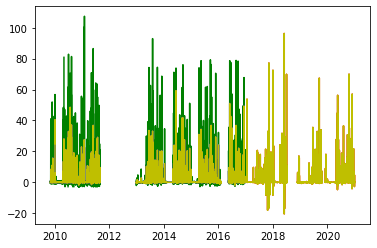

In [24]:
plt.plot(pandas.to_datetime(high_frequency_mooring_dataset['time'].values),high_frequency_mooring_dataset['RN_485'][:,0,:,:].squeeze(),'g')

plt.plot(pandas.to_datetime(mooring_dataset_downsampled['time'].values),mooring_dataset_downsampled['RN_485'][:,0,:,:].squeeze(),'b')
plt.plot(pandas.to_datetime(target_frequency_mooring_dataset['time'].values),target_frequency_mooring_dataset['RN_485'][:,0,:,:].squeeze(),'r',alpha=1)
plt.plot(pandas.to_datetime(merged_dataset['time'].values),merged_dataset['RN_485'][:,0,:,:].squeeze(),'y')
plt.plot(pandas.to_datetime(merged_dataset['time'].values),merged_dataset['RN_485'][:,1,:,:].squeeze(),'y')

In [23]:
print(merged_dataset['time'][0].values)
print(merged_dataset['time'][-1].values)

merged_dataset

2009-11-06T07:00:00.000000000
2021-01-01T11:00:00.000000000


<xarray.Dataset>
Dimensions:   (depth: 2, lat: 1, lon: 1, time: 97535)
Coordinates:
  * depth     (depth) float64 -4.0 -3.5
  * time      (time) datetime64[ns] 2009-11-06T07:00:00 ... 2021-01-01T11:00:00
  * lat       (lat) float32 12.0
  * lon       (lon) float32 90.0
Data variables:
    QRN_5485  (time, depth, lat, lon) float32 nan 2.0 nan 2.0 ... nan 2.0 nan
    RN_485    (time, depth, lat, lon) float32 nan 0.04 nan ... nan -0.0 nan
    time2     (time) float64 7.14e+07 7.35e+07 7.71e+07 ... 7.92e+07 8.28e+07
    SRN_6485  (time, depth, lat, lon) float32 nan 5.0 nan 5.0 ... nan 1.0 nan

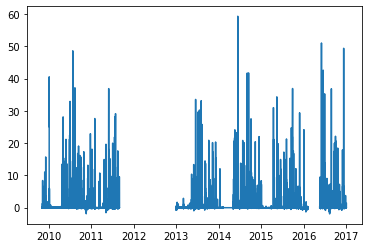

In [19]:
plt.plot(mooring_dataset_downsampled.sel(time=uncommon_time_steps)['time'],mooring_dataset_downsampled.sel(time=uncommon_time_steps)['RN_485'].squeeze())

In [5]:
high_frequency_mooring_dataset

<xarray.Dataset>
Dimensions:   (depth: 1, lat: 1, lon: 1, time: 202022)
Coordinates:
  * time      (time) datetime64[ns] 2009-09-14T02:40:00 ... 2013-07-18T00:50:00
  * depth     (depth) float32 -3.0
  * lat       (lat) float32 -12.0
  * lon       (lon) float32 67.0
Data variables:
    time2     (time) int32 ...
    RH_910    (time, depth, lat, lon) float32 ...
    QRH_5910  (time, depth, lat, lon) float32 ...
    SRH_6910  (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                12s67e
    site_code:                    12s67e
    wmo_platform_code:            14043
    array:                        RAMA
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                21:00 27-OCT-2021

In [88]:
output_path = full_path_to_downsample.replace(i_dir,target_frequency)
if i_dir == 'two_minutes':
    output_path = output_path.replace('2m','hr')
elif i_dir == '10_minutes':
    output_path = output_path.replace('10m','hr')

root_path_file, extension = os.path.splitext(output_path)
                
output_path = root_path_file + '.merged_downsampled' + extension

In [89]:
output_path

'/tube1/cha674/Tropical_Indian_Ocean/RAMA_Moorings/Update/RAMA_Array/SST/hourly/sst8s67e_hr.merged_downsampled.cdf'

In [73]:
target_frequency_mooring_dataset[common_variables]

<xarray.Dataset>
Dimensions:  (depth: 1, lat: 1, lon: 1, time: 42195)
Coordinates:
  * time     (time) datetime64[ns] 2015-10-30T04:00:00 ... 2020-08-22T06:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 -8.0
  * lon      (lon) float32 67.0
Data variables:
    time2    (time) int32 ...
    T_25     (time, depth, lat, lon) float32 ...
    ST_6025  (time, depth, lat, lon) float32 ...
    QT_5025  (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                8s67e
    site_code:                    8s67e
    wmo_platform_code:            14040
    array:                        RAMA
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                20:58 27-OCT-2021

In [55]:
double_blah = mooring_dataset_downsampled.sel(time=mooring_dataset_downsampled['time'][blah].values)

In [56]:
double_blah

<xarray.Dataset>
Dimensions:  (depth: 1, lat: 1, lon: 1, time: 67668)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-14T02:00:00 ... 2014-10-03T13:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 -8.0
  * lon      (lon) float32 67.0
Data variables:
    time2    (time) float64 5.19e+07 5.55e+07 5.91e+07 ... 1.5e+06 4.8e+06
    T_25     (time, depth, lat, lon) float32 29.87 29.75 29.78 ... 26.92 26.97
    QT_5025  (time, depth, lat, lon) float32 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    ST_6025  (time, depth, lat, lon) float32 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0

In [58]:
plt.plot()

In [63]:
var_list = target_frequency_mooring_dataset.variables.keys()

In [69]:
res = [i for i in target_frequency_mooring_dataset.data_vars] 

In [70]:
res

['time2', 'T_25', 'QT_5025', 'ST_6025', 'ZSST_2003']

In [34]:
target_frequency_mooring_dataset['time']  = target_frequency_mooring_dates


NameError: name 'target_frequency_mooring_dates' is not defined

In [31]:
np.abs(time_delta_start_time) > pandas.Timedelta(1,unit="D")

True

In [5]:
mooring_dataset[]

<xarray.Dataset>
Dimensions:  (depth: 1, lat: 1, lon: 1, time: 275276)
Coordinates:
  * time     (time) datetime64[ns] 2014-08-06T23:00:00 ... 2019-10-31T14:10:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 67.0
Data variables:
    time2    (time) int32 ...
    T_25     (time, depth, lat, lon) float32 ...
    QT_5025  (time, depth, lat, lon) float32 ...
    ST_6025  (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n67e
    site_code:                    0n67e
    wmo_platform_code:            23015
    array:                        RAMA
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                20:56 27-OCT-2021

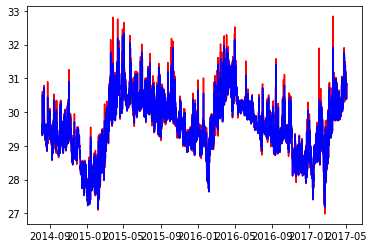

In [7]:
days_to_plot = 1000

plt.plot(mooring_dataset['time'].sel(time=slice(mooring_dataset['time'].min(),mooring_dataset['time'].min()+pandas.Timedelta(days_to_plot,unit='day'))).values,
         mooring_dataset['T_25'].sel(time=slice(mooring_dataset['time'].min(),mooring_dataset['time'].min()+pandas.Timedelta(days_to_plot,unit='day'))).squeeze().values,'r')
plt.plot(mooring_dataset_downsampled['time'].sel(time=slice(mooring_dataset_downsampled['time'].min(),mooring_dataset_downsampled['time'].min()+pandas.Timedelta(days_to_plot,unit='day'))).values,
         mooring_dataset_downsampled['T_25'].sel(time=slice(mooring_dataset_downsampled['time'].min(),mooring_dataset_downsampled['time'].min()+pandas.Timedelta(days_to_plot,unit='day'))).squeeze().values,'b')

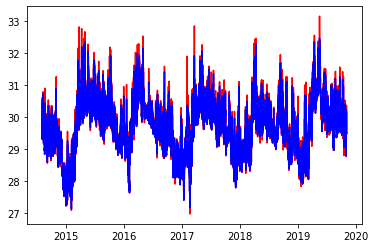

In [8]:
plt.plot(mooring_dataset['time'].values,
         mooring_dataset['T_25'].squeeze().values,'r')
plt.plot(mooring_dataset_downsampled['time'].values,
         mooring_dataset_downsampled['T_25'].squeeze().values,'b')

    
'''

temperature_profile_file_list = ['t0n67e_dy.cdf','t12n90e_dy.cdf','t12s80.5e_dy.cdf', 't1.5n67e_dy.cdf', 't1.5s80.5e_dy.cdf','t4s57e_dy.cdf','t5s95e_dy.cdf', 't8s55e_dy.cdf', 't8s95e_dy.cdf',
                                 't0n80.5e_dy.cdf', 't12s55e_dy.cdf', 't12s93e_dy.cdf',  't15n90e_dy.cdf', 't4n67e_dy.cdf',  't4s67e_dy.cdf', 't8n67e_dy.cdf', 't8s67e_dy.cdf',
                                 't0n90e_dy.cdf',   't12s67e_dy.cdf', 't15n65e_dy.cdf',  't1.5s67e_dy.cdf', 't4n90e_dy.cdf', 't4s80.5e_dy.cdf','t8n90e_dy.cdf','t8s80.5e_dy.cdf']

salinity_profile_file_list = ['s0n67e_dy.cdf','s12n90e_dy.cdf','s12s80.5e_dy.cdf', 's1.5n67e_dy.cdf', 's1.5s80.5e_dy.cdf','s4s57e_dy.cdf','s5s95e_dy.cdf', 's8s55e_dy.cdf', 's8s95e_dy.cdf',
                              's0n80.5e_dy.cdf', 's12s55e_dy.cdf', 's12s93e_dy.cdf',  's15n90e_dy.cdf', 's4n67e_dy.cdf',  's4s67e_dy.cdf', 's8n67e_dy.cdf', 's8s67e_dy.cdf',
                              's0n90e_dy.cdf',   's12s67e_dy.cdf', 's15n65e_dy.cdf',  's1.5s67e_dy.cdf', 's4n90e_dy.cdf', 's4s80.5e_dy.cdf','s8n90e_dy.cdf','s8s80.5e_dy.cdf']


mooring_dataarray_list= []

mooring_latitude = []
mooring_longitude = []

for i_file in range(0,len(temperature_profile_file_list)):
    
    temperature_mooring_da = xarray.open_dataset(os.path.join(RAMA_moorings_file_path,temperature_profile_file_list[i_file]),decode_times=True,use_cftime=False)
    temperature_mooring_da = temperature_mooring_da.rename({'depth':'depth_T_20','time':'time_T_20'})

    mooring_latitude.append(temperature_mooring_da['lat'].squeeze().values)
    mooring_longitude.append(temperature_mooring_da['lon'].squeeze().values)

    salinity_profile_file_name = 's' + temperature_profile_file_list[i_file][1::]
    salinity_mooring_da = xarray.open_dataset(os.path.join(RAMA_moorings_file_path,salinity_profile_file_name),decode_times=True,use_cftime=False)
    salinity_mooring_da = salinity_mooring_da.rename({'depth':'depth_S_41','time':'time_S_41'})

    mooring_dataarray_list.append(temperature_mooring_da)
    mooring_dataarray_list[-1]['S_41'] = salinity_mooring_da['S_41']
    
mooring_latitude  = np.asarray(mooring_latitude)
mooring_longitude = np.asarray(mooring_longitude)
'''